# HW1 

# Yifan Wu (yw515)

### 1. Feedforward: Building a ReLu 2 Layer neural network

#### 1. Plot (draw) a network with:
> ####  • 2 inputs, 
#### • 2 hidden layers (where the ﬁrst layer contains 3 hidden units and the second contains 2 hidden units) and a
#### • 3-class output (use a softmax function) 

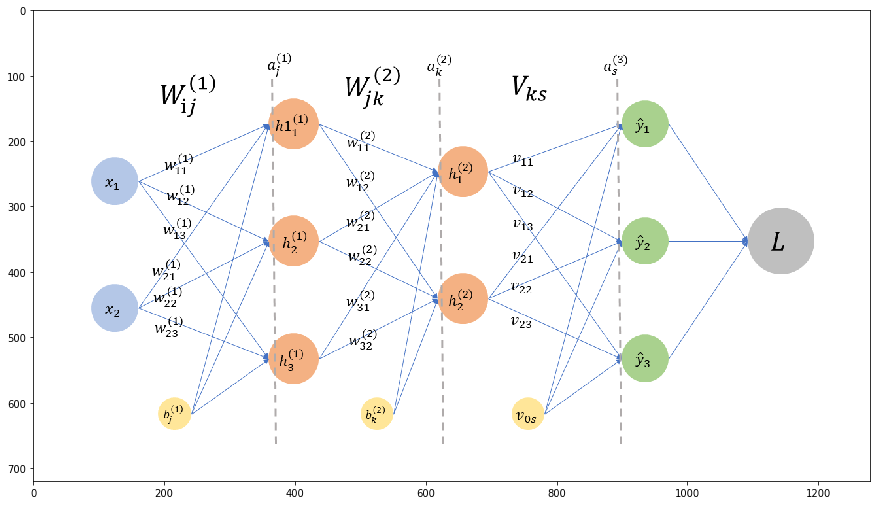

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img=mpimg.imread("my_network.png")
plt.figure(figsize = (15,15))
plt.imshow(img)

#### 2. Write out the mathematical equation for this network

$h_{j}^{(1)} = max(0, W_{1j}^{(1)}x_{1} + W_{2j}^{(1)}x_{1} + b_{j}^{(1)})$

$h_{k}^{(2)} = max(0, W_{1k}^{(2)}h_{1}^{(1)} + W_{2k}^{(2)}h_{2}^{(1)} + W_{3k}^{(2)}h_{3}^{(1)} + b_{k}^{(2)})$

$\hat y_{s} = \frac{exp(V_{1s}h_{1}^{(2)} + V_{2s}h_{2}^{(2)} + V_{0s})}{\sum_s exp(V_{1s}h_{1}^{(2)} + V_{2s}h_{2}^{(2)} + V_{0s}))}$

#### 3. Write out the function in python, call it ff_nn_2_ReLu(...)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def softmax(A):
    e = np.exp(A)
    return e / e.sum(axis=1).reshape((-1,1))

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    
    a_1 = np.dot(x, w_1) + b_1 
    h_1 = np.maximum(0, a_1)

    a_2 = np.dot(h_1, w_2) + b_2
    h_2 = np.maximum(0, a_2)

    y = softmax(np.dot(h_2,v) + c)

    return np.array(y)

#### 4. what are the class probabilities associated with the forward pass of each sample?

In [5]:
x = np.array([[1., 0., 0.], 
              [-1., -1., 1.]]).T

w_2 = np.array([[1, 0], 
               [-1, 0], 
               [0, 0.5]])

w_1 = np.array([[1., 0., 0.], 
               [-1., -1., 0.]])

v = np.array([[1., 1.], 
             [0., 0.], 
             [-1., -1.]]).T

b_1 = np.array([0., 0., 1.]).T
b_2 = np.array([1., -1.]).T
c = np.array([1., 0., 0.]).T

result = ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)
result

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

In [221]:
np.sum(result, axis = 1)

array([1., 1., 1.])

### 2 Gradient Descent
#### 1. What are the partial derivatives of f with respect to x and to y?

$f = (1 - x)^2 + 100((y-x^2)^2)$

$\frac{df}{dx} = 2 (-1 + x + 200 x^3 - 200 x y)$

$\frac{df}{dy} = 200 (-x^2 + y)$

#### 2. Create a visualization of the contours of the Rosenbrock function. 

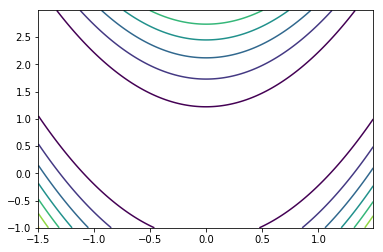

In [6]:
# Gradient Descent 2.2 Create a visualization of the contours of the Rosenbrock function.

delta = 0.01
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1, 3, delta)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2  + 100 * (Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 3. Write a Gradient Descent algorithm for ﬁnding the minimum of the function. Visualize your results with a few diﬀerent learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = 2 * (-1 + x + 200 * x**3 - 200 * x * y) 
    df_dy = 200 * (-x**2 + y)
    return np.array([df_dx, df_dy])

[array([ 0.92830161, -0.94812013])]


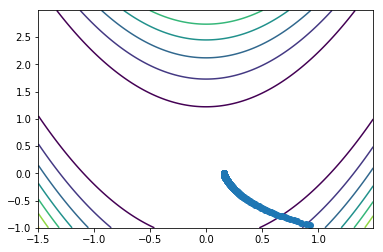

In [8]:
%matplotlib inline

def grad_descent(starting_point = None, iterations = 5, learning_rate = 1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1.5, size = 2)
    trajectory = [point]
    print(trajectory)
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent(iterations = 300, learning_rate = 5**(-6))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

[array([0.58412059, 0.87200971])]


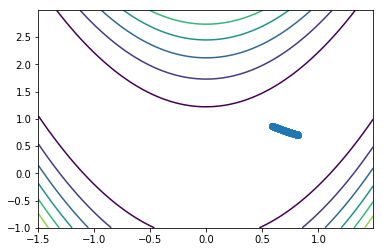

In [9]:
traj = grad_descent(iterations = 300, learning_rate = 5**(-7))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

[array([ 0.24626753, -0.43800839])]


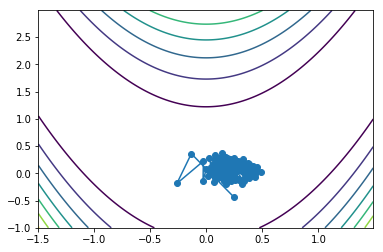

In [10]:
traj = grad_descent(iterations = 300, learning_rate = 5**(-3))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:, 0]
y = traj[:, 1]
plt.plot(x, y, '-o')

#### 4. Write a Gradient Descent With Momentum algorithm for ﬁnding the minimum. Visualize your results with a few diﬀerent settings of the algorithm’s hyperparameters.

In [11]:
# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.0009, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

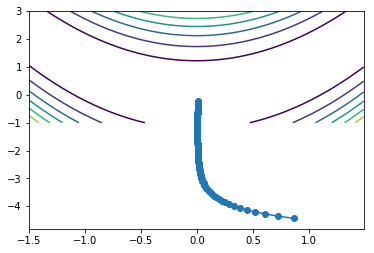

In [16]:
# --- Visualizing trajectory --
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=8*10**(-5), alpha=5**(-6))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

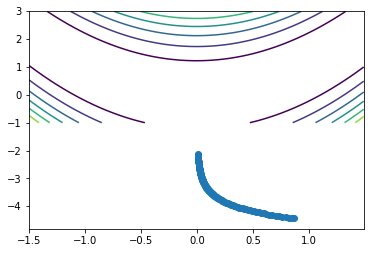

In [19]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=10**(-5), alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

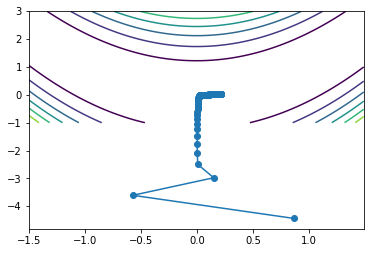

In [23]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=8*10**(-4), alpha=5**(-6))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

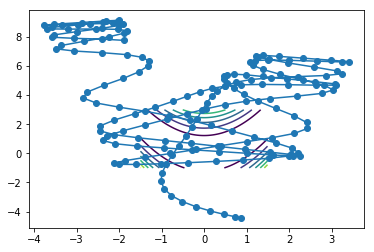

In [32]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=8*10**(-5), alpha=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

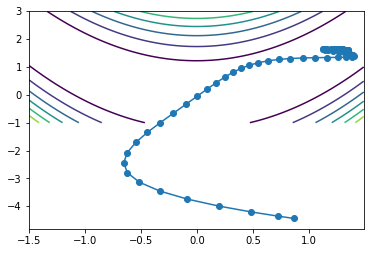

In [35]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=8*10**(-5), alpha=0.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

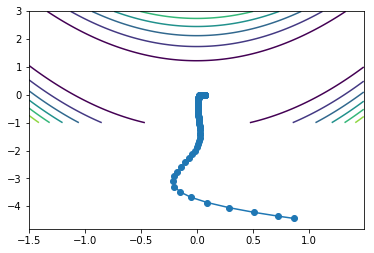

In [37]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=180, epsilon=8*10**(-5), alpha=0.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 3 Backprop
#### 1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$L(y, \hat y) = y_1\log \hat y_1 + y_2\log \hat y_2 + y_3\log \hat y_3$

$\begin {aligned}\frac{\partial L}{\partial V_{ks}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial V_{ks}} \\
&= ( \mathbb{1}_{(s = true\ class)} - \hat y_s )h_k^{(2)}
\end {aligned}$ , s=1,2,3

$\begin {aligned}\frac{\partial L}{\partial v_{0s}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial v_{0s}} \\
&= \sum_s(\mathbb{1}_{(s = true\ class)} - \hat y_s)
\end {aligned}$ , s=1,2,3

$\begin {aligned}\frac{\partial L}{\partial W_{jk}^{(2)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}\frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_{k}^{(2)}}\frac{\partial a_{k}^{(2)}}{\partial W_{jk}^{(2)}}  \\
&= \sum_s(\mathbb{1}_{(s = true\ class)} - \hat y_s)V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}h_j^{(1)}
\end {aligned}$ , s=1,2,3; j = 1,2,3; k = 1, 2;

$\begin {aligned}\frac{\partial L}{\partial b_{k}^{2}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_{k}^{(2)}}\frac{\partial a_{k}^{(2)}}{\partial b_{k}^{2}})  \\
&= \sum_s(\mathbb{1}_{(s = true\ class)} - \hat y_s)(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)})
\end {aligned}$ , s=1,2,3; j = 1,2,3; k = 1, 2;

$\begin {aligned}\frac{\partial L}{\partial W_{ij}^{(1)}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}}\frac{\partial a_k^{(2)}}{\partial h_j^{(1)}} \frac{\partial h_j^{(1)}}{\partial a_j ^{(1)}} \frac{\partial a_j ^{(1)}}{\partial W_{ij}^{(1)}})  \\
&= \sum_s(\mathbb{1}_{(s = true\ class)} - \hat y_s)(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}W_{jk}^{(2)}\mathbb{1}_{(a_j^{(1)} > 0)}x_i)
\end {aligned}$ , s=1,2,3; j = 1,2,3; k = 1, 2; i = 1,2

$\begin {aligned}\frac{\partial L}{\partial b_{j}^{1}} &= \sum_s \frac{\partial L}{\partial \hat y_s}\frac{\partial \hat y_s}{\partial a_s^{(3)}}(\sum_k \frac{\partial a_s^{(3)}}{\partial h_k^{(2)}}\frac{\partial h_k^{(2)}}{\partial a_k^{(2)}}(\sum_j \frac{\partial a_k^{(2)}}{\partial h_j^{(1)}} \frac{\partial h_j^{(1)}}{\partial a_j ^{(1)}} \frac{\partial a_j ^{(1)}}{\partial b_{j}^{1}}))  \\
&= \sum_s(\mathbb{1}_{(s = true\ class) - \hat y_s})(\sum_k V_{ks}\mathbb{1}_{(a_k^{(2)} > 0)}(\sum_j W_{jk}^{(2)}\mathbb{1}_{(a_j^{(1)} > 0)}))
\end {aligned}$ , s=1,2,3; j = 1,2,3; k = 1, 2; i = 1,2

#### 2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [65]:
# Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

def grad_f(data, T, Y, H1, H2, V, W2, W1, b1, b2):
    
    d_v = H2.T.dot(T - Y)
    d_v0 = (T - Y).sum(axis = 0)
    
    d_w2 = H1.T.dot((T - Y).dot(V.T) * (H2 > 0))    
    d_b2 = ((T - Y).dot(V.T) * (H2 > 0)).sum(axis=0)
    
    d_w1 = data.T.dot(((T - Y).dot(V.T)*(H2 > 0)).dot(W2.T)*(H1 > 0)) 
    d_b1 = (((T - Y).dot(V.T)*(H2 > 0)).dot(W2.T)*(H1 > 0)).sum(axis=0)
    
    return d_v, d_v0, d_w2, d_b2, d_w1, d_b1
    

#### 3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters $µ_1 = (0,2)$, $µ_2 = (2,−2)$, $µ_3 = (−2,−2)$; $Σ_i = \left[
 \begin{matrix}
   1 & 0\\
   0 & 1 
  \end{matrix} 
\right]$; i = 1,2,3 that you’ll use for ﬁtting your network. Plot your sample dataset, coloring data points by their respective class.

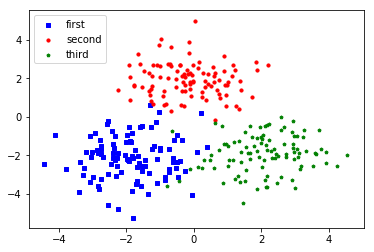

In [44]:
def generate_data(N = 100):
    np.random.seed(123)
    # Setting up 3 clusters with centers at [-2,-2],[0,2],[2,-2]
    c1 = np.random.multivariate_normal([-2,-2], np.eye(2), size=N)
    c2 = np.random.multivariate_normal([0,2], np.eye(2), size=N)
    c3  = np.random.multivariate_normal([2,-2], np.eye(2), size=N)
    data = np.vstack((c1,c2,c3))
    # Classes of the three clusters
    classes = np.array([0]*N + [1]*N + [2]*N)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(c1[:,0],c1[:,1], s=10, c='b', marker="s", label='first')
    ax1.scatter(c2[:,0],c2[:,1], s=10, c='r', marker="o", label='second')
    ax1.scatter(c3[:,0],c3[:,1], s=10, c='g', marker="p", label='third')
    plt.legend(loc='upper left');
    plt.show()
    # One hot encoding for T:
    T = np.zeros((N * 3, 3))
    for n in range(N * 3):
        T[n, classes[n]] = 1
    
    return T, data

T, data = generate_data()

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [90]:
def softmax(A):
    e = np.exp(A)
    return e / e.sum(axis=1).reshape((-1,1))

def ff_nn_2_ReLu(data, W1, W2, V, b1, b2, v0):
    
    a_1 = np.dot(data, W1) + b1 
    h_1 = np.maximum(0, a_1)

    a_2 = np.dot(h_1, W2) + b2
    h_2 = np.maximum(0, a_2)

    y = softmax(np.dot(h_2, V) + v0)

    return h_1, h_2, np.array(y)
  
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()    

The loss dropped from initial 1715.31 to finally: 160.9 after 50 iterations.


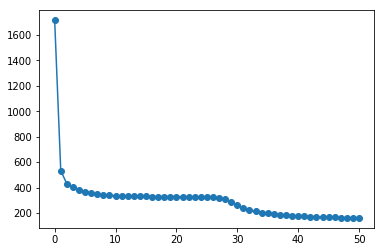

In [206]:
def gradient_descent(iterations = 500):
    
    # Intilaizing weights
    np.random.seed(1)
    V = np.random.randn(2 * 3).reshape(2,3)
    v0= np.random.randn(3).reshape(1,3)
    W2 = np.random.randn(3 * 2).reshape(3,2)
    b2 = np.random.randn(2).reshape(1,2)
    W1 = np.random.randn(2 * 3).reshape(2,3)
    b1 = np.random.randn(3).reshape(1,3)
    H1, H2, Y = ff_nn_2_ReLu(data, W1, W2, V, b1, b2, v0) #feed forward to get initial H1, H2, and Y

    costs = [-cost(T, Y)]
    learning_rate = 2*10e-4

    for i in range(iterations):

        d_v, d_v0, d_w2, d_b2, d_w1, d_b1 = grad_f(data, T, Y, H1, H2, V, W2, W1, b1, b2)

        V = V + learning_rate * d_v
        v0 = v0 + learning_rate * d_v0
        W2 = W2 + learning_rate * d_w2
        b2 = b2 + learning_rate * d_b2
        W1 = W1 + learning_rate * d_w1
        b1 = b1 + learning_rate * d_b1

        H1, H2, Y = ff_nn_2_ReLu(data, W1, W2, V, b1, b2, v0)
        
        c = -cost(T, Y)
        costs.append(c)

    plt.plot(range(iterations+1), costs, '-o')
    print("The loss dropped from initial " + str(round(costs[0],2)) + " to finally: " + str(round(costs[-1],2)) 
          + " after " + str(iterations) + " iterations.") 
    
    
gradient_descent(50)    

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more eﬃciently.

The loss dropped from initial 1715.31 to finally: 92.36 after 50 iterations.


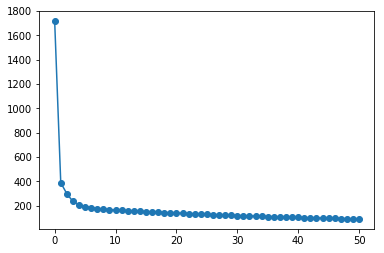

In [208]:
def grad_descent_with_momentum(iterations=500, alpha=.0009, epsilon=0.0005):
    
    # Intilaizing weights
    np.random.seed(1)
    V = np.random.randn(2 * 3).reshape(2,3)
    v0 = np.random.randn(3).reshape(1,3)
    W2 = np.random.randn(3 * 2).reshape(3,2)
    b2 = np.random.randn(2).reshape(1,2)
    W1 = np.random.randn(2 * 3).reshape(2,3)
    b1 = np.random.randn(3).reshape(1,3)
    H1, H2, Y = ff_nn_2_ReLu(data, W1, W2, V, b1, b2, v0) #feed forward to get initial H1, H2, and Y    
    v_V, v_v0, v_W2, v_b2, v_W1, v_b1 = (np.zeros_like(x) for x in [V, v0, W2, b2, W1, b1]) #initializing velocity vectors
    
    costs = [-cost(T, Y)]
    for i in range(iterations):

        d_v, d_v0, d_w2, d_b2, d_w1, d_b1 = grad_f(data, T, Y, H1, H2, V, W2, W1, b1, b2)
   
        v_V = alpha*v_V + epsilon*d_v
        V = V + v_V
        
        v_v0 = alpha*v_v0 + epsilon*d_v0
        v0 = v0 + v_v0
        
        v_W2 = alpha*v_W2 + epsilon*d_w2
        W2 = W2 + v_W2
        
        v_b2 = alpha*v_b2 + epsilon*d_b2
        b2 = b2 + v_b2
        
        v_W1 = alpha*v_W1 + epsilon*d_w1
        W1 = W1 + v_W1
        
        v_b1 = alpha*v_b1 + epsilon*d_b1
        b1 = b1 + v_b1       
        
        H1, H2, Y = ff_nn_2_ReLu(data, W1, W2, V, b1, b2, v0) #feed forward
        
        c = -cost(T, Y)
        costs.append(c)

    plt.plot(range(iterations+1), costs, '-o')
    print("The loss dropped from initial " + str(round(costs[0],2)) + " to finally: " + str(round(costs[-1],2)) 
          + " after " + str(iterations) + " iterations.") 
    
    
grad_descent_with_momentum(iterations=50, alpha=.0009, epsilon = 0.001)  